In [67]:
# Some standard code imports
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import numpy as np

# For drawing graphs
import networkx as nx

# Qiskit imports
from qiskit import transpile, QuantumCircuit
from qiskit.circuit.library import TwoLocal
from qiskit.quantum_info import Statevector
from qiskit_optimization import QuadraticProgram
from qiskit_algorithms import NumPyMinimumEigensolver
from qiskit_algorithms.minimum_eigensolvers import VQE
from qiskit_optimization.algorithms import MinimumEigenOptimizer, RecursiveMinimumEigenOptimizer
from qiskit_optimization.converters import LinearEqualityToPenalty
from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit.quantum_info import SparsePauliOp
from qiskit.quantum_info import SparseObservable
from qiskit_optimization.translators import from_docplex_mp
from qiskit.circuit.library import RealAmplitudes
from qiskit_algorithms.optimizers import SPSA
from qiskit_algorithms import VQE
from qiskit_optimization.applications import Maxcut, Tsp
from qiskit.circuit import Parameter
from qiskit.circuit.library import QFT
from qiskit.circuit.library import QuadraticForm
from qiskit_aer import AerSimulator
from qiskit.primitives import StatevectorEstimator
from qiskit.primitives import Estimator
from qiskit.primitives import Sampler
from qiskit_algorithms import SamplingVQE
from qiskit.visualization import plot_histogram

# auxilliary function to plot graphs
def plot_result(G, x):
    colors = ['r' if x[i] == 0 else 'b' for i in range(n)]
    pos, default_axes = nx.spring_layout(G), plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=.8, pos=pos)
    
print('imports done')

imports done


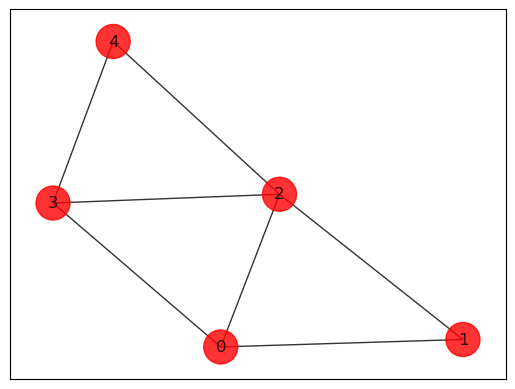

In [2]:
# Create graph
G = nx.Graph()

# Add 5 nodes
n = 5
G.add_nodes_from(range(n))

# Add edges: tuple is (i,j,weight) where (i,j) is the edge
edges = [(0, 1, 1.0), (0, 2, 1.0), (0, 3, 1.0), (1, 2, 1.0), (2, 3, 1.0), (2, 4, 1.0), (3, 4, 1.0)]
G.add_weighted_edges_from(edges)

# Plot graph
plot_result(G, [0]*n)

In [3]:
# Import a model from DOcplex
from docplex.mp.model import Model

# Name the model
mdl = Model('MaxCut')

# Add a binary variable to the model for each node in the graph
x = mdl.binary_var_list('x{}'.format(i) for i in range(n))

# Define the objective function
objective = mdl.sum([ w * (x[i] + x[j] - 2*x[i]*x[j]) for (i, j, w) in edges])

# Add an equality constraint
b = 2
mdl.add_constraint(mdl.sum(x) == b)

# And let's maximize it!
mdl.maximize(objective)

# Let's print the model
mdl.prettyprint()

// This file has been generated by DOcplex
// model name is: MaxCut
// var contrainer section
dvar bool x[5];

maximize
 3 x0 + 2 x1 + 4 x2 + 3 x3 + 2 x4 [ - 2 x0*x1 - 2 x0*x2 - 2 x0*x3 - 2 x1*x2
 - 2 x2*x3 - 2 x2*x4 - 2 x3*x4 ];
 
subject to {
 x0 + x1 + x2 + x3 + x4 == 2;

}


In [4]:
# Instantiate an empty QuadraticProgram object
qp = QuadraticProgram()

# Put the model inside it

qp = from_docplex_mp(mdl)

print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: MaxCut

Maximize
 obj: 3 x0 + 2 x1 + 4 x2 + 3 x3 + 2 x4 + [ - 4 x0*x1 - 4 x0*x2 - 4 x0*x3
      - 4 x1*x2 - 4 x2*x3 - 4 x2*x4 - 4 x3*x4 ]/2
Subject To
 c0: x0 + x1 + x2 + x3 + x4 = 2

Bounds
 0 <= x0 <= 1
 0 <= x1 <= 1
 0 <= x2 <= 1
 0 <= x3 <= 1
 0 <= x4 <= 1

Binaries
 x0 x1 x2 x3 x4
End



In [5]:
qp.objective.linear.to_dict()

{0: 3.0, 1: 2.0, 2: 4.0, 3: 3.0, 4: 2.0}

In [6]:
qp.objective.quadratic.to_dict()

{(0, 1): -2.0,
 (0, 2): -2.0,
 (0, 3): -2.0,
 (1, 2): -2.0,
 (2, 3): -2.0,
 (2, 4): -2.0,
 (3, 4): -2.0}

fval=5.0, x0=1.0, x1=0.0, x2=1.0, x3=0.0, x4=0.0, status=SUCCESS


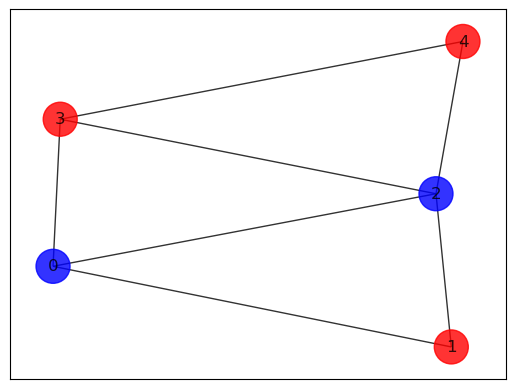

In [7]:
solver = MinimumEigenOptimizer(NumPyMinimumEigensolver())
result = solver.solve(qp)
print(result)
plot_result(G, result.x)

In [8]:
eq_converter = LinearEqualityToPenalty()
qp_eq = eq_converter.convert(qp)
print(qp_eq.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: MaxCut

Maximize
 obj: 119 x0 + 118 x1 + 120 x2 + 119 x3 + 118 x4 + [ - 58 x0^2 - 120 x0*x1
      - 120 x0*x2 - 120 x0*x3 - 116 x0*x4 - 58 x1^2 - 120 x1*x2 - 116 x1*x3
      - 116 x1*x4 - 58 x2^2 - 120 x2*x3 - 120 x2*x4 - 58 x3^2 - 120 x3*x4
      - 58 x4^2 ]/2 -116
Subject To

Bounds
 0 <= x0 <= 1
 0 <= x1 <= 1
 0 <= x2 <= 1
 0 <= x3 <= 1
 0 <= x4 <= 1

Binaries
 x0 x1 x2 x3 x4
End



In [9]:
direct_translation = QuadraticProgramToQubo(penalty=10).convert(qp)

# Let's print the model!
print(direct_translation.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: MaxCut

Minimize
 obj: - 43 x0 - 42 x1 - 44 x2 - 43 x3 - 42 x4 + [ 20 x0^2 + 44 x0*x1 + 44 x0*x2
      + 44 x0*x3 + 40 x0*x4 + 20 x1^2 + 44 x1*x2 + 40 x1*x3 + 40 x1*x4 + 20 x2^2
      + 44 x2*x3 + 44 x2*x4 + 20 x3^2 + 44 x3*x4 + 20 x4^2 ]/2 + 40
Subject To

Bounds
 0 <= x0 <= 1
 0 <= x1 <= 1
 0 <= x2 <= 1
 0 <= x3 <= 1
 0 <= x4 <= 1

Binaries
 x0 x1 x2 x3 x4
End



In [10]:
H, offset = qp_eq.to_ising()
print('offset =', offset)
print('H =', H)

offset = 40.0
H = SparsePauliOp(['IIIIZ', 'IIIZI', 'IIZII', 'IZIII', 'ZIIII', 'IIIZZ', 'IIZIZ', 'IZIIZ', 'ZIIIZ', 'IIZZI', 'IZIZI', 'ZIIZI', 'IZZII', 'ZIZII', 'ZZIII'],
              coeffs=[-14.5+0.j, -14.5+0.j, -14.5+0.j, -14.5+0.j, -14.5+0.j,  15. +0.j,
  15. +0.j,  15. +0.j,  14.5+0.j,  15. +0.j,  14.5+0.j,  14.5+0.j,
  15. +0.j,  15. +0.j,  15. +0.j])


Minimum energy for Hamiltonian: -45.0


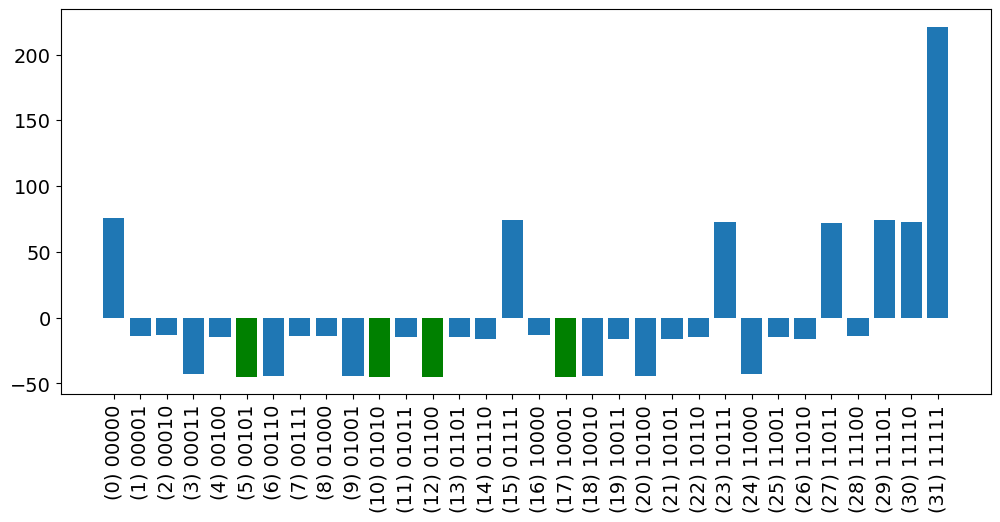

In [11]:
H_matrix = np.real(H.to_matrix())

#Get the set of basis states which have the lowest energy
opt_indices = list(np.where(H_matrix.diagonal() == min(H_matrix.diagonal())))[0]
plt.figure(figsize=(12, 5))

print('Minimum energy for Hamiltonian: {0}'.format(min(H_matrix.diagonal())))
# Plot the expectation value of the energy of different basis states,
# and color those basis states which would have the lowest energy
plt.bar(range(2**n), H_matrix.diagonal())
plt.bar(opt_indices, H_matrix.diagonal()[opt_indices], color='g')
plt.xticks(range(2**n), ['('+str(i)+') {0:05b}'.format(i) for i in range(2**n)], rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

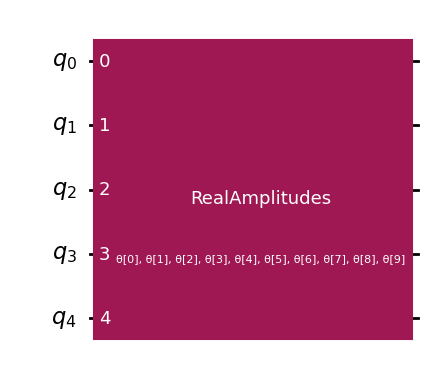

In [12]:
qc = RealAmplitudes(5, reps=1)
qc.draw(output='mpl')

In [13]:
estimator = Estimator()
vqe = VQE(estimator, qc, SPSA(maxiter=100))
result = vqe.compute_minimum_eigenvalue(H)
print('Estimated optimal value:', np.round(result.eigenvalue, decimals=4))

C:\Users\markw\AppData\Local\Temp\ipykernel_20524\1415996260.py:1: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


Estimated optimal value: -44.4959


In [14]:
seed = 10598
sampler = Sampler()

# construct VQE
spsa = SPSA(maxiter=300)
ry = TwoLocal(H.num_qubits, 'ry', 'cz', reps=5, entanglement='linear')
vqe = SamplingVQE(sampler, ry, spsa)

# run VQE
result = vqe.compute_minimum_eigenvalue(H)

# print results
print('energy:', result.eigenvalue.real)
print('time:', result.optimizer_time)
print('max-cut objective:', result.eigenvalue.real + offset)


C:\Users\markw\AppData\Local\Temp\ipykernel_20524\3519611350.py:2: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


energy: -44.027521951520185
time: 10.251898765563965
max-cut objective: -4.027521951520185


In [15]:
# Computing the weight matrix from the random graph
w = np.zeros([n,n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i,j,default=0)
        if temp != 0:
            w[i,j] = 1 
print(w)

[[0. 1. 1. 1. 0.]
 [1. 0. 1. 0. 0.]
 [1. 1. 0. 1. 1.]
 [1. 0. 1. 0. 1.]
 [0. 0. 1. 1. 0.]]


solution: [0 0 1 0 1]
solution objective: 4.0


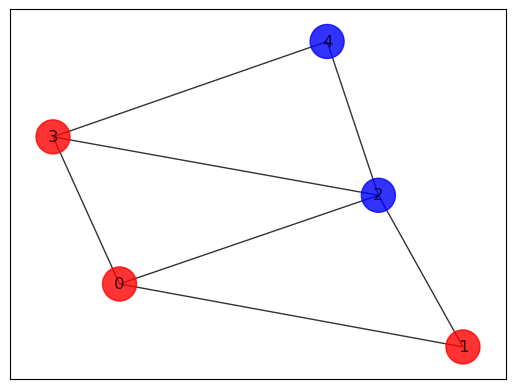

In [16]:
max_cut = Maxcut(w)
x = max_cut.sample_most_likely(result.eigenstate)
print('solution:', x)
print('solution objective:', qp.objective.evaluate(x))
colors = ["r" if x[i] == 0 else "c" for i in range(n)]
plot_result(G, x)

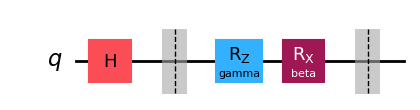

In [18]:
gamma, beta = Parameter('gamma'), Parameter('beta')

# This circuit would be 1 time step
qc = QuantumCircuit(1)
qc.h(0)
qc.barrier()
qc.rz(gamma, 0)
qc.rx(beta, 0)
qc.barrier()
qc.draw(output='mpl')

In [19]:
def construct_schedule(T, N):
    delta_t = T/N
    gammas, betas = [], []  # H_C, H_X parameters
    for i in range(N+1):
        t = i * delta_t
        gammas += [ 2 * delta_t * t/T ]  # H_C
        betas += [ -2 * delta_t * (1 - t/T) ]  # H_X
    return gammas, betas

T = 5
N = 10
gammas, betas = construct_schedule(T, N)

In [20]:
probabilities = np.zeros((2, N+1))

# Set up the circuit
qc = QuantumCircuit(1)
qc.h(0)
qc.barrier()
# Do the evolution
for i, (gamma, beta) in enumerate(zip(gammas, betas)):
    qc.rz(gamma, 0)
    qc.rx(beta, 0)
    qc.barrier()
    #Simulate the circuit, and store the probability of |0> and |1> at each timestep
    probabilities[:, i] = Statevector.from_instruction(qc).probabilities()

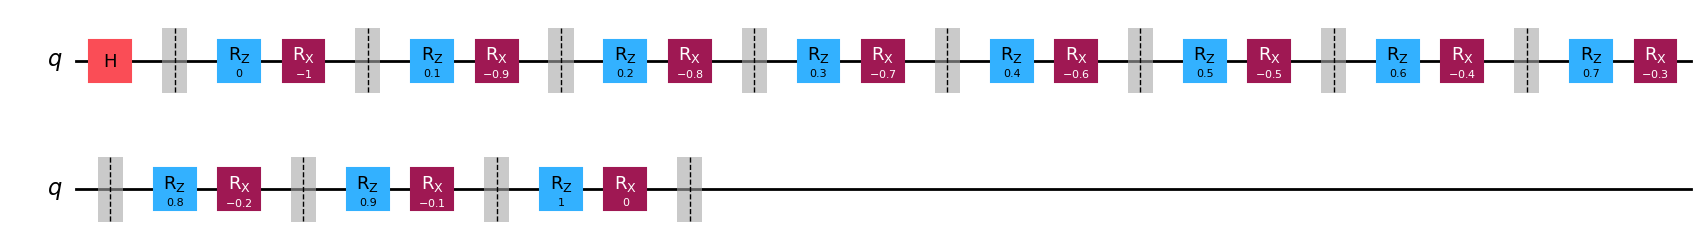

In [21]:
qc.draw(output='mpl')

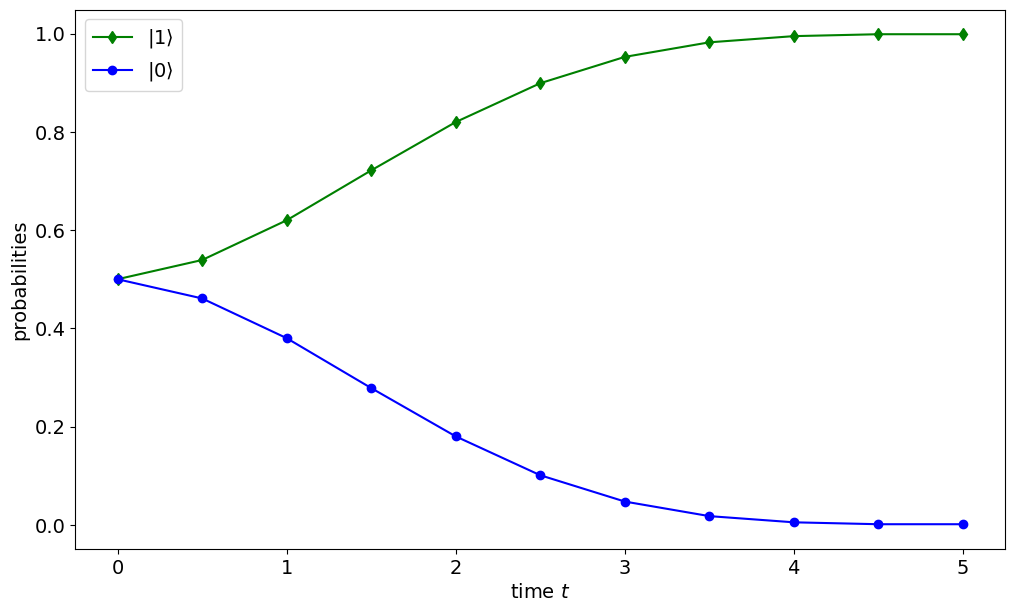

In [22]:
plt.figure(figsize=(12, 7))
plt.plot(np.linspace(0, T, N+1), probabilities[1, :], 'gd-', label=r'$|1\rangle$')
plt.plot(np.linspace(0, T, N+1), probabilities[0, :], 'bo-', label=r'$|0\rangle$')
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('time $t$', fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('probabilities', fontsize=14);

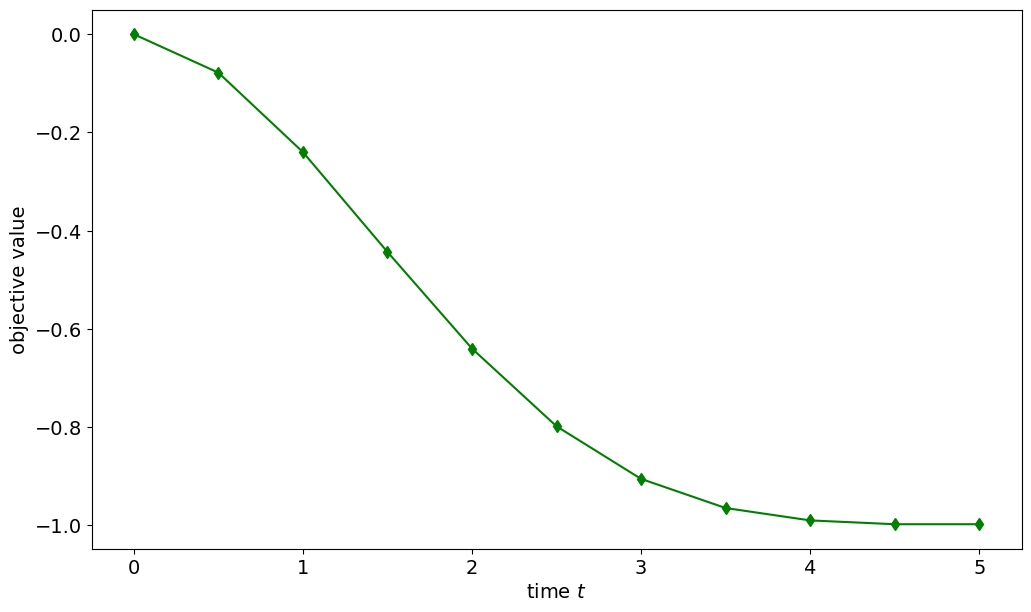

In [23]:
plt.figure(figsize=(12, 7))
plt.plot(np.linspace(0, T, N+1), probabilities[0, :] - probabilities[1, :], 'gd-')
plt.xticks(fontsize=14)
plt.xlabel('time $t$', fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('objective value', fontsize=14);

In [24]:
def twos_complement(val, num_bits):
    val = int(val, 2)
    if (val & (1 << (num_bits - 1))) != 0:
        val = val - (1 << num_bits)     
    return val   

In [25]:
print(twos_complement('0000', 4))
print(twos_complement('0101', 4))
print(twos_complement('1010', 4))
print(twos_complement('1111', 4))

0
5
-6
-1


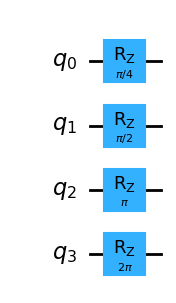

In [26]:
def encode(num_qubits, k):
    qc = QuantumCircuit(num_qubits, name='enc({})'.format(k))
    for j in range(num_qubits):
        # Angle of rotation
        theta = 2*np.pi * 2**j / 2**num_qubits * k
        qc.rz(theta, j)
    return qc

encode(4, 2).draw('mpl')

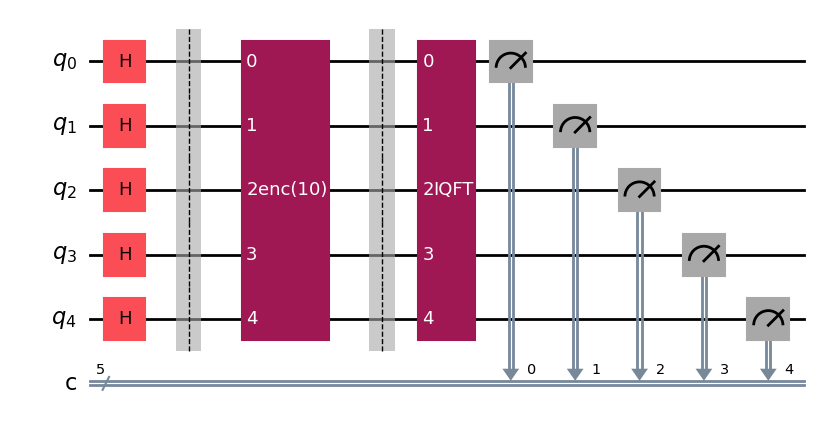

In [37]:
num_value_qubits = 5
number_to_encode = 10

qc = QuantumCircuit(num_value_qubits, num_value_qubits)
qc.h(range(num_value_qubits))
qc.barrier()
qc.append(encode(num_value_qubits, number_to_encode), range(num_value_qubits))
qc.barrier()
qc.append(QFT(num_value_qubits, do_swaps=True, inverse=True), qc.qubits)

# Note: we have to mess around with the bitstring ordering here
# in order for the two's compliment math to work out.
qc.measure(qc.qregs[0], qc.cregs[0])

qc.draw('mpl',fold=120)

In [38]:
backend = AerSimulator()
qcc = transpile(qc, backend)
result = backend.run(qcc).result()
counts = result.get_counts()
print(counts)
for key in counts:
    print(key, ' -->', twos_complement(key, num_value_qubits))

{'01010': 1024}
01010  --> 10


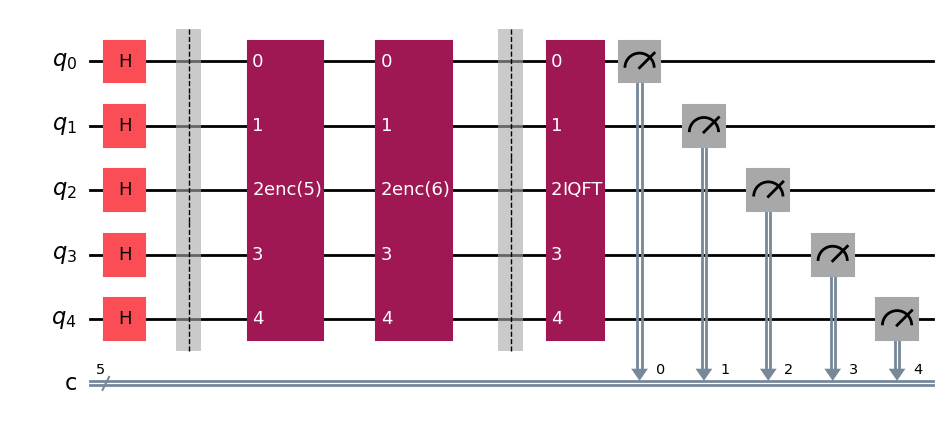

In [39]:
num_value_qubits = 5
number_to_encode = 10

qc = QuantumCircuit(num_value_qubits, num_value_qubits)
qc.h(range(num_value_qubits))
qc.barrier()
qc.append(encode(num_value_qubits, 5), range(num_value_qubits))
qc.append(encode(num_value_qubits, 6), range(num_value_qubits))
qc.barrier()
qc.append(QFT(num_value_qubits, do_swaps=True, inverse=True), qc.qubits)

# Note: we have to mess around with the bitstring ordering here
# in order for the two's compliment math to work out.
qc.measure(qc.qregs[0], qc.cregs[0])

qc.draw('mpl',fold=120)

In [40]:
backend = AerSimulator()
qcc = transpile(qc, backend)
result = backend.run(qcc).result()
counts = result.get_counts()
for key in counts:
    print(key, ' -->', twos_complement(key, num_value_qubits))

01011  --> 11


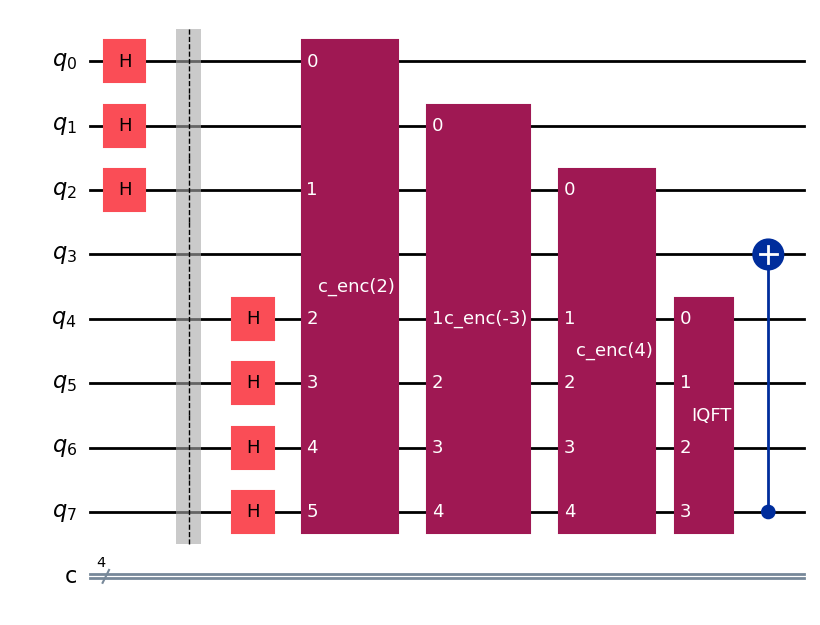

In [70]:
num_input_qubits=4
num_value_qubits=4
num_total_qubits = num_input_qubits+num_value_qubits
qc = QuantumCircuit(num_total_qubits,4)
qc.h([0,1,2])
qc.barrier()
qc.h(range(num_input_qubits, num_total_qubits))
qc.append(encode(num_value_qubits, 2).control(2), [0,2]+list(range(num_input_qubits, num_total_qubits)))
qc.append(encode(num_value_qubits, -3).control(), [1]+list(range(num_input_qubits, num_total_qubits)))
qc.append(encode(num_value_qubits, 4).control(), [2]+list(range(num_input_qubits, num_total_qubits)))
qc.append(QFT(num_value_qubits, do_swaps=True, inverse=True), range(num_input_qubits, num_total_qubits))
#qc.measure_all()
qc.cx(7,3)
qc.draw('mpl')

In [43]:
backend = AerSimulator()
qcc = transpile(qc, backend)
result = backend.run(qcc).result()
counts = result.get_counts()
for key, value in counts.items():
    x = key[num_value_qubits:]
    y_bin = key[:num_value_qubits]
    y_int = twos_complement(y_bin,num_value_qubits)
    print(x, '-->', y_bin, '-->', y_int, '\t(counts: {})'.format(value))

011 --> 1101 --> -3 	(counts: 133)
001 --> 0000 --> 0 	(counts: 137)
000 --> 0000 --> 0 	(counts: 132)
111 --> 0011 --> 3 	(counts: 143)
110 --> 0001 --> 1 	(counts: 117)
010 --> 1101 --> -3 	(counts: 118)
101 --> 0110 --> 6 	(counts: 125)
100 --> 0100 --> 4 	(counts: 119)


In [64]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mcx(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "$U_s$"
    return U_s

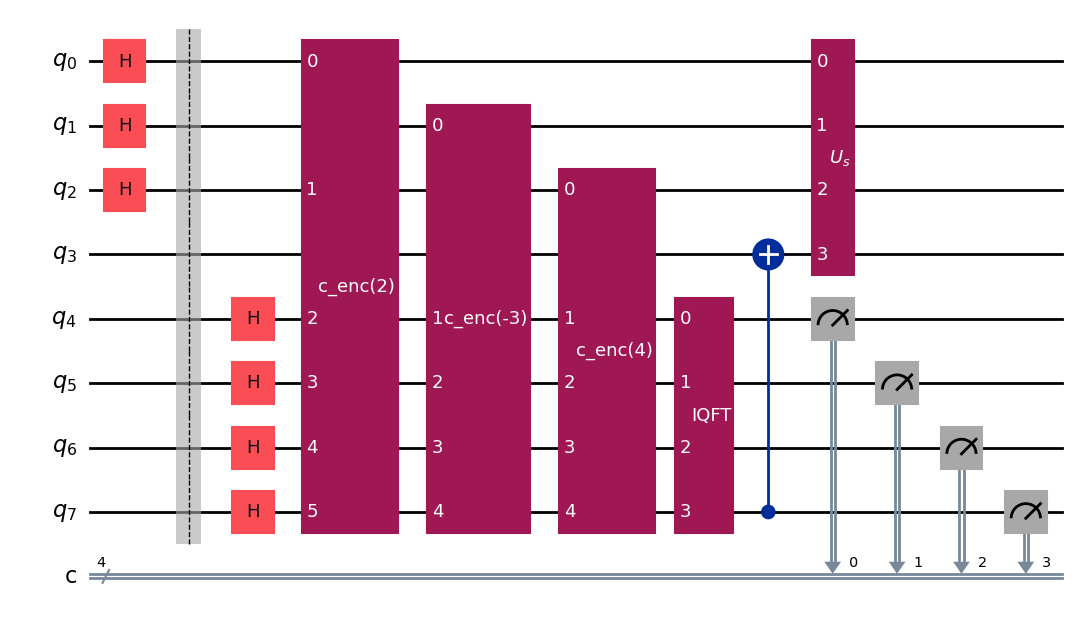

In [71]:
qc.append(diffuser(4), range(4))
qc.measure(range(4,8),range(4))
qc.draw('mpl')

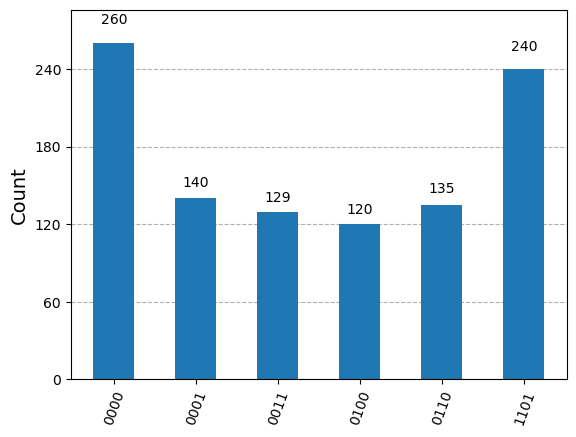

In [68]:
backend = AerSimulator()
qcc = transpile(qc, backend)
results = backend.run(qcc, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

In [72]:
qp_eq = QuadraticProgramToQubo(penalty=1).convert(qp)

A = qp_eq.objective.quadratic.to_array()
b = qp_eq.objective.linear.to_array()
c = qp_eq.objective.constant

# set number of results qubits
num_value_qubits = 5

# construct circuit to evaluate quadratic form
qf = QuadraticForm(num_value_qubits, A, b, c)
qf.draw(fold=120)

┌───────┐
q19_0: ┤0      ├
       │       │
q19_1: ┤1      ├
       │       │
q19_2: ┤2      ├
       │       │
q19_3: ┤3      ├
       │       │
q19_4: ┤4      ├
       │  Q(x) │
q20_0: ┤5      ├
       │       │
q20_1: ┤6      ├
       │       │
q20_2: ┤7      ├
       │       │
q20_3: ┤8      ├
       │       │
q20_4: ┤9      ├
       └───────┘

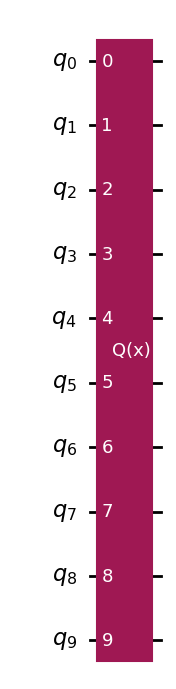

In [73]:
num_value_qubits = 5
qc = QuantumCircuit(n + num_value_qubits, name='U_f')
qc.append(qf, range(n + num_value_qubits))            # 1. compute Q(x)
qc.draw('mpl')

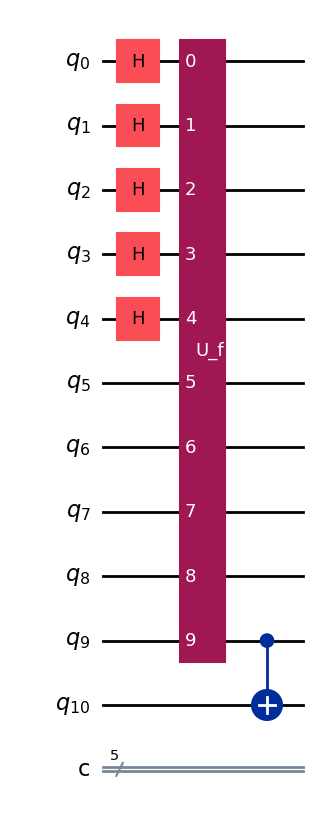

In [74]:
qc_grover = QuantumCircuit(n + num_value_qubits+1,n)
qc_grover.h(range(n))
qc_grover.append(qc, range(qc_grover.num_qubits-1))
qc_grover.cx(9,10)
qc_grover.draw('mpl')

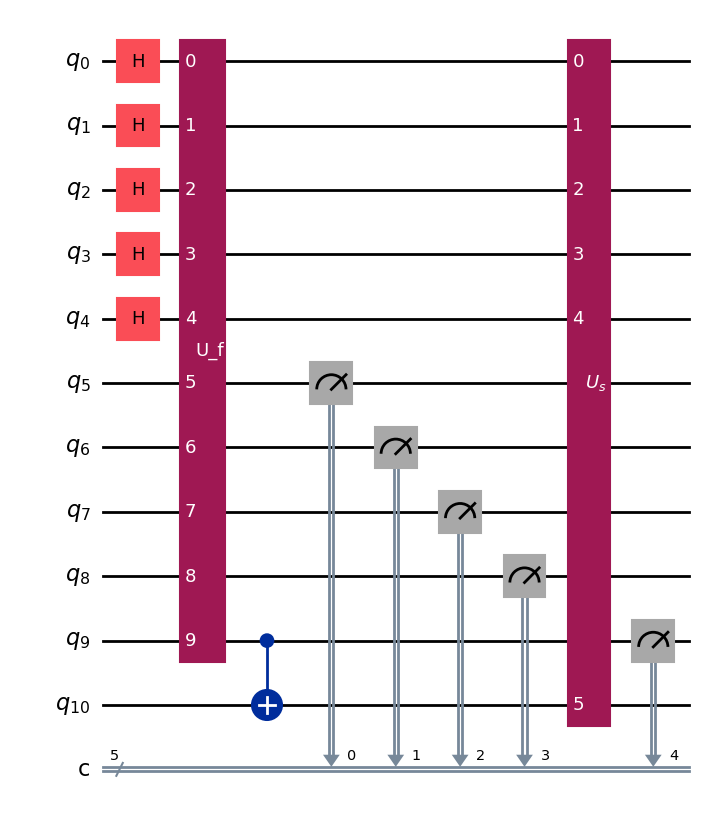

In [75]:
qc_grover.append(diffuser(n+1), [0,1,2,3,4,10])
qc_grover.measure(range(5,10),range(5))
qc_grover.draw('mpl')

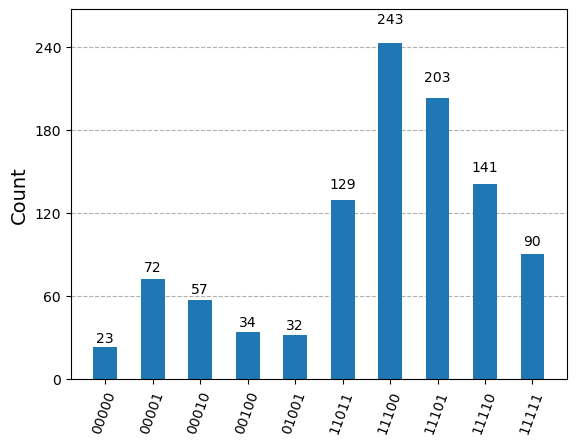

In [76]:
backend = AerSimulator()
qcc = transpile(qc_grover, backend)
results = backend.run(qcc, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)